## Fitting problem 3

This is a <it>linear</it> model.  (It is not a linear function of $x$, but the model
is linear in the fit parameters $a_1$ and $a_2$.)

The data for this problem is available in the file `fit_3.dat` which can be downloaded from http://www.eg.bucknell.edu/~phys310/hw/hw4.html. One option is to download the data file to a local directory, and then import it using `np.loadtxt()`. Another option is to look download it directly into the Jupyter notebook. I will use the second option here.

In [1]:
import numpy as np
from scipy import optimize

import urllib    # for importing data from URL

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
#%matplotlib notebook
#for making pdf-file of this notebook, use instead following line
%matplotlib inline
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

####  Options for getting data into notebook
+ Start by downloading the data files into the working directory. The `np.loadtxt` 
function imports the content of the data file into a `numpy` array.
The `unpack = 'True'` option transposes the array so that each column is in 
a separate array.
+ Download directly from a URL

In [3]:
def f(x, a1, a2):
    '''Linear model function with adjustable parameters a1 and a2'''
    return a1*np.sin(2.*np.pi*x)+ a2*np.sin(4.*np.pi*x)

In [4]:
g = urllib.request.urlopen('https://www.eg.bucknell.edu/~phys310/hw/assignments/fitting_3/fit_3.dat')
data = np.loadtxt(g)

x, y, u = data.T

In [5]:
#Uncomment to look at the data.
#data

#### (a) Is the suspected relationship relationship between $x$ and $y$ a linear model, or a nonlinear model?

\begin{equation}
   y=f(x)=a_1 \, \sin(2 \pi x) + a_2 \, \sin(4 \pi x)
\end{equation}
This is a linear model. (It is not a linear function of  𝑥 , but the model is linear in the fit parameters $a_1$ and $a_2$.)

#### (b) Perform a fit to these data using the generic optimize.curve_fit routine from scipy that we demonstrated in class, using the assumed functional form shown above.

#### Perform fit

In [6]:
popt, pcov = optimize.curve_fit(f, x, y, sigma=u, absolute_sigma=True)
print(popt)  # best fit parameters
print(pcov)  # covariance matrix
for i in range(len(pcov)):
    print(np.sqrt(pcov[i,i])) # uncertanties in fit parameters

[1.96501629 0.87923822]
[[6.39999997e-03 1.10687288e-11]
 [1.10687288e-11 6.39999999e-03]]
0.07999999982280558
0.07999999993543226


#### Results
$a_1 = 1.96 \pm 0.08\quad\quad\mbox{and}\quad\quad a_2 = 0.88 \pm 0.08$

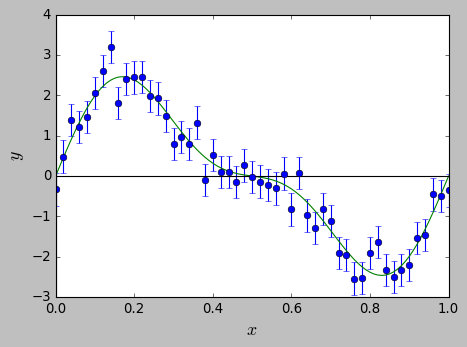

In [7]:
plt.figure()
plt.errorbar(x,y,u,fmt='o')
xc = np.linspace(0,1,101)
yc = f(xc,*popt)
plt.plot(xc,yc)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='k')
plt.axvline(0, color='k');

#### (c) Plot your residuals. 

#### Residuals:

In [8]:
r = y - f(x,*popt)
r_norm = r/u

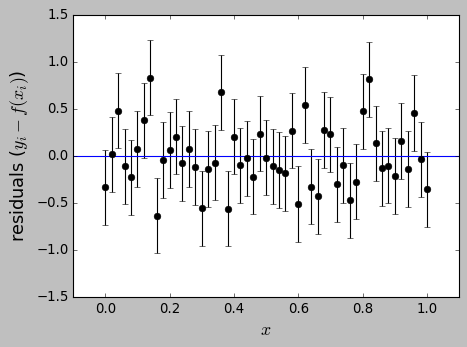

In [9]:
plt.figure()
plt.errorbar(x,r,u, fmt = 'ko')
plt.xlabel('x')
plt.ylabel('residuals  ($y_i - f(x_i)$')
plt.axhline(0)
plt.xlabel('$x$')
plt.ylabel('residuals ($y_i - f(x_i)$)')
plt.xlim(-0.1, 1.1);

#### (d) Determine the goodness-of-fit parameter $\chi^2$ for this data set and model.

#### Goodness of fit

$$ \chi^2 = \sum_i\left(\frac{y_i - y(x_i)}{\alpha_i}\right)^2 $$ 

In [10]:
chi2 = np.sum(r_norm**2)  # Chi-square
chi2_nu = chi2/(len(r)-2) # reduced chi-square
print(chi2, chi2_nu, len(r))

36.61459756007561 0.7472366848995022 51


###### Conclusions:

#### (e) Given your analysis, does your fit to the data appear to be reasonable? Comment briefly.  & (f) What are your resultant values for $a_1$ and $a_2$? (Include uncertainties.)

The goodness of fit parameter $\chi^2$ is less than the number of data points (but not much less), or, equivalently
the reduced chi-square $\chi^2_\nu$ is less than 1 (but not much less than one), so the data is consistent with the 
assumed model. Also, in Fig.2 the residuals fluctuate around $0$ and show no systematic dependence on $x$.

Therefore we can use the best-fit parameters found above:

$$ a_1 = 1.96 \pm 0.08\quad\quad \mbox{and}\quad\quad a_2 = 0.88 \pm 0.08  $$

#### Version information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [11]:
%load_ext version_information

In [12]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1127.19.1.el7.x86_64 x86_64 with centos 7.9.2009 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Thu Feb 10 11:15:41 2022 EST